In [ ]:
import pandas as pd
import numpy as np

#%%capture
!pip install transformers
!pip install accelerate -U
!pip install --upgrade tensorflow
! pip install datasets
! pip install huggingface_hub



import warnings
warnings.filterwarnings('ignore')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.5/7.5 MB 45.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 59.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 52.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 251.2/251.2 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 921.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 30.7 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorf

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pwd

/content


In [ ]:
import os

mount_point = "/content/drive/My Drive/Colab Notebooks/NLP"

if not os.path.exists(mount_point):
    os.makedirs(mount_point)



Import Libraries

In [ ]:
##for data handling
import pandas as pd
import numpy  as np

##visualizations

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

##NLP

import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from wordcloud import WordCloud, STOPWORDS
import re,string, unicodedata
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.corpus import wordnet
from collections import Counter
import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('maxent_ne_chunker')
nltk.download("words")
import nltk
from nltk.corpus import gutenberg
from nltk import FreqDist




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
train_path= '/content/drive/My Drive/Colab Notebooks/NLP/Train.csv'
test_path= '/content/drive/MyDrive/Colab Notebooks/NLP/Test.csv'

In [ ]:
%%time
train_df= pd.read_csv(train_path)
test_df= pd.read_csv(test_path)


CPU times: user 73.3 ms, sys: 11.6 ms, total: 84.9 ms
Wall time: 1.66 s


In [ ]:
#loading the dataset

train_df.head(10)

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667
9,VB25IDQK,AIDS vaccine created at Oregon Health &amp; Sc...,1.0,0.666667


In [ ]:
test_df.head(10)

,tweet_id,safe_text
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."
5,01V1X8XW,I think that active duty soldiers should get v...
6,01VCVYR0,New Choices For Seasonal Flu Vaccines: WebMD H...
7,01VO7KBO,"As if the vaccination scares weren't enough, t..."
8,020SYHIL,Vaccines are Key to Good Health <url> via <url>
9,02CQIJUI,"Mom: ""do you feel sick in any other way? A fev..."


 The CRISP-DM Framework will be used. The framework consists of the following steps:


*   Data Understanding
*   Data Preparation
*   Modelling
*   Evaluation
*   Deployment






In [ ]:
#Rename the safe_text column to tweets to conform to tweet_id
train_df.rename(columns= {"safe_text": "tweets"}, inplace= True)
test_df.rename(columns= {"safe_text": "tweets"}, inplace= True)

In [ ]:
train_df.loc[:10]

,tweet_id,tweets,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667
9,VB25IDQK,AIDS vaccine created at Oregon Health &amp; Sc...,1.0,0.666667


In [ ]:
test_df.loc[:10]

,tweet_id,tweets
0,00BHHHP1,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,00UNMD0E,Students starting school without whooping coug...
2,01AXPTJF,"I'm kinda over every ep of <user> being ""rippe..."
3,01HOEQJW,How many innocent children die for lack of vac...
4,01JUKMAO,"CDC eyeing bird flu vaccine for humans, though..."
5,01V1X8XW,I think that active duty soldiers should get v...
6,01VCVYR0,New Choices For Seasonal Flu Vaccines: WebMD H...
7,01VO7KBO,"As if the vaccination scares weren't enough, t..."
8,020SYHIL,Vaccines are Key to Good Health <url> via <url>
9,02CQIJUI,"Mom: ""do you feel sick in any other way? A fev..."


In [ ]:
##create copies of the datasets

train_data= train_df.copy()
test_data= test_df.copy()

**DATA UNDERSTANDING**

The folllowing will be explored to better interpret the datasets being used

*   check for data info
*   Check for missing values
*   Check for duplicates
*   Check for unique values
*   create visuals





**INFO**

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   tweets     10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5177 entries, 0 to 5176
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  5177 non-null   object
 1   tweets    5176 non-null   object
dtypes: object(2)
memory usage: 81.0+ KB


In [ ]:
train_df.describe()

,label,agreement
count,10000.000000,9999.000000
mean,0.301567,0.854252
std,0.646718,0.180707
min,-1.000000,0.333333
25%,0.000000,0.666667
50%,0.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [ ]:
test_df.describe()

,tweet_id,tweets
count,5177,5176
unique,5177,5061
top,00BHHHP1,<user> #GOP STOP blaming #Immigrants first #Eb...
freq,1,9


**MISSING VALUES**

In [ ]:
train_df.isna().sum()

tweet_id     0
tweets       0
label        1
agreement    2
dtype: int64

In [ ]:
test_df.isna().sum()

tweet_id    0
tweets      1
dtype: int64

**REMARKS**


*  There are NaN and missing values and they will be eliminated




**DUPLICATES**

In [ ]:
train_df[train_df.duplicated()]

,tweet_id,tweets,label,agreement


In [ ]:
test_df[test_df.duplicated()]

,tweet_id,tweets


**Remarks**

There are no duplicates

**UNIQUE VALUES**

In [ ]:
train_df.label.unique()

array([ 0.        ,  1.        , -1.        ,         nan,  0.66666667])

In [ ]:
positive= train_df[train_df["label"]== 1]

In [ ]:
negative= train_df[train_df["label"]== -1]

In [ ]:
neutral= train_df[train_df["label"]== 0]

In [ ]:
positive.head()

,tweet_id,tweets,label,agreement
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667


In [ ]:
positive.tail()

,tweet_id,tweets,label,agreement
9994,3DP4M7JX,<user> doesn't want to vaccinate her kids. I w...,1.0,0.666667
9995,X8B650Z4,I'll say I am glad Mom gave me the MMR vaccina...,1.0,1.000000
9996,IU0TIJDI,Living in a time where the sperm I used to was...,1.0,1.000000
9997,WKKPCJY6,<user> <user> In spite of all measles outbrea...,1.0,0.666667
10000,P6190L3Q,Pneumonia vaccine: for women w risk of pulmona...,1.0,0.666667


In [ ]:
neutral.head()

,tweet_id,tweets,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000
10,PEM9KSVV,"<user> @ this point I have 2 text, butw/Bon Jo...",0.0,1.000000
11,TTLQWD2R,"My prediction, vaccine exemption in Arizona wi...",0.0,0.666667
13,9SCBVTZP,1$Mug Noche <user> #mmr #mixmasterrod #dcdj #m...,0.0,1.000000


In [ ]:
negative.head()

,tweet_id,tweets,label,agreement
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000
24,89AB846O,<user> #CDC lied and hid data that black boys ...,-1.0,1.000000
25,XSXFN1C8,<user> vaccines causing autism,-1.0,1.000000
35,6PMH7C56,"<user> <user> Other than that, his defense is ...",-1.0,0.333333


 **Visualizations**

Distrubution of Sentiments

In [ ]:
plot_1=px.histogram(data_frame= train_df, x= "label", title= "Distribution of Sentiments")
plot_1.show()

**Remarks**


*   Majority of the tweets were neutral
*   The positive tweets were more than the negative tweets
*   There was a value that wasn't associated with any of the classes defined






Creating a graph for Common Words used

In [ ]:
## Setting an instance for the Stopwords variable

stopwords= STOPWORDS

In [ ]:
len(stopwords)

192

In [ ]:
##Setting an instance for  Wordcloud library

wc= WordCloud(background_color= "white",

              stopwords=stopwords,

              height= 600,

              width= 400

              )

In [ ]:
tweets_train= train_df["tweets"].dropna()

In [ ]:
## Creating a single string from all the text in the several rows

text_train= " ".join(tweets_train)

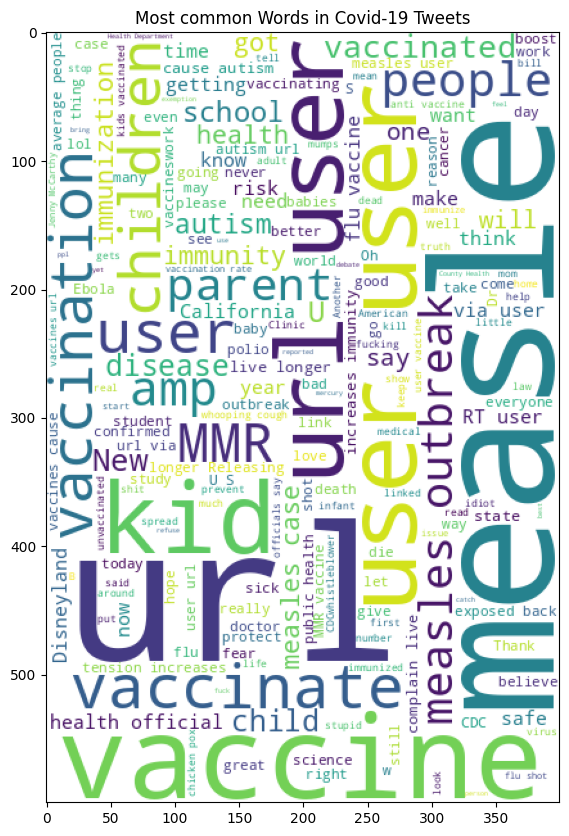

In [ ]:
wc_train= wc.generate(text_train)
plt.figure(figsize= (15,10))
plt.title("Most common Words in Covid-19 Tweets")
plt.imshow(wc_train)

**Remarks**
The most common words tweeeted wer


*   Vaccine
*   Url
*   Measle
*   Kid
*   Health Official
*   User
*   Vaccination
*   Children





**Tweets Length**

In [ ]:
train_df["length_tweet"]= [len(i.split(" ")) for i in train_df["tweets"]]

In [ ]:
train_df.loc[:10]

,tweet_id,tweets,label,agreement,tweet_length,length_tweet
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.000000,15,15
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.000000,25,25
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.000000,7,7
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.000000,28,28
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.000000,20,20
5,OVNPOAUX,<user> a nearly 67 year old study when mental ...,1.0,0.666667,22,22
6,JDA2QDV5,"Study of more than 95,000 kids finds no link b...",1.0,0.666667,15,15
7,S6UKR4OJ,psa: VACCINATE YOUR FUCKING KIDS,1.0,1.000000,5,5
8,V6IJATBE,Coughing extra on the shuttle and everyone thi...,1.0,0.666667,14,14
9,VB25IDQK,AIDS vaccine created at Oregon Health &amp; Sc...,1.0,0.666667,17,17


In [ ]:
train_df["length_tweet"].max()

33

In [ ]:
##Acquiring the length of my tweet
len_tweet= train_df["length_tweet"].value_counts().reset_index()

In [ ]:
len_tweet.columns= ["length_tweet", "count"]

In [ ]:
##creating a plot for the length of my tweets
plot_2= px.scatter(data_frame= len_tweet, x= "length_tweet", y= "count", size= "count", color= "length_tweet", title= "Length of Tweets")

plot_2.show()

**Remarks**

Majority of tweets consist of 18 words


**DATA PREPARATION**

At this stage, the issues encoutered during the data exploration will be solved. These include, misssing values, NaN values. Also, NLP preprocessing will be done.

**Missing Values**

The missing values will be dropped since they were few

In [ ]:
train_df= train_df.dropna()

In [ ]:
test_df= test_df.dropna()

In [ ]:
train_df.isna().sum()

tweet_id        0
tweets          0
label           0
agreement       0
tweet_length    0
length_tweet    0
dtype: int64

In [ ]:
test_df.isna().sum()

tweet_id    0
tweets      0
dtype: int64

There are no missing values/ Nan values in both the train and test data

In [ ]:
#checking for any defective value
train_df["label"].unique()

array([ 0.,  1., -1.])

The dataset doesn't contain any defective value aside the predefined values

**IRRELEVANT COLUMNS**

The tweet ID Column is not relevant for analysis and hence will be dropped

In [ ]:
train_df= train_df.drop("tweet_id", axis=1)
test_df= test_df.drop("tweet_id", axis=1)

KeyError: ignored

In [ ]:
train_df.head()

,tweets,label,agreement,tweet_length,length_tweet
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0,15,15
1,I'm 100% thinking of devoting my career to pro...,1.0,1.0,25,25
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0,7,7
3,I mean if they immunize my kid with something ...,-1.0,1.0,28,28
4,Thanks to <user> Catch me performing at La Nui...,0.0,1.0,20,20


In [ ]:
test_df.head()

,tweets
0,<user> <user> ... &amp; 4 a vaccine given 2 he...
1,Students starting school without whooping coug...
2,"I'm kinda over every ep of <user> being ""rippe..."
3,How many innocent children die for lack of vac...
4,"CDC eyeing bird flu vaccine for humans, though..."


**NLP Preprocessing**

 **Changing Everything to Lowercase**

In [ ]:
train_df["tweets"]= train_df["tweets"].str.lower()
test_df["tweets"]= test_df["tweets"].str.lower()

**Eliminating Punctuations**

In [ ]:
##removing hashtags:

def punctuation_remover(text):
  ##removing has tags
  text= re.sub(r'#\w+', '', text)
  ##removing punctuations
  text= re.sub("[^\w\s]", repl= "", string=text)
  return text

In [ ]:
##creating a new column for tweets without punctuation
train_df["clean_tweet"]= train_df["tweets"].apply(punctuation_remover)

In [ ]:
train_df.head()

,tweets,label,agreement,tweet_length,length_tweet,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.0,15,15,me amp the big homie meanboy3000 stegman...
1,i'm 100% thinking of devoting my career to pro...,1.0,1.0,25,25,im 100 thinking of devoting my career to provi...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.0,7,7,vaccines do not vaccinate your child
3,i mean if they immunize my kid with something ...,-1.0,1.0,28,28,i mean if they immunize my kid with something ...
4,thanks to <user> catch me performing at la nui...,0.0,1.0,20,20,thanks to user catch me performing at la nuit ...


In [ ]:
test_df["clean_tweet"]= test_df["tweets"].apply(punctuation_remover)

In [ ]:
test_df.tail()

,tweets,clean_tweet
5172,jenny mccarthy is on new years rockin eve. wha...,jenny mccarthy is on new years rockin eve what...
5173,measles reported in clark co. for 1st time sin...,measles reported in clark co for 1st time sinc...
5174,<user> issues alert regarding measles in tx. k...,user issues alert regarding measles in tx keep...
5175,i can't believe people don't vaccinate their k...,i cant believe people dont vaccinate their kid...
5176,"""<user> alternatives to #flu vaccine <url> #n...",user alternatives to vaccine url a good re...


**Removing Special Characters**

In [ ]:
def remove_special_characters(input_string):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_string = re.sub(pattern, '', input_string)
    return cleaned_string

In [ ]:
train_clean["clean_tweet"]= train_clean["clean_tweet"].apply(remove_special_characters)

**Eliminating Stop words**

In [ ]:
##showing the stopwrods
" ".join(STOPWORDS)

"you've this other you'd being under at is here's that's of where's no wasn't had before through in who they yourselves she'd could as hers haven't some with i've he's from until can we once weren't let's am whom those www which our they've about she's down we'd same why to a cannot against however each above she'll she they're why's nor do for otherwise too you would and all few off an can't that theirs i mustn't k he'll he r so it such if again own just you'll yours then him won't else when since both hence they'd there what not what's hadn't aren't wouldn't only their these http don't they'll he'd herself myself shouldn't we'll who's also any very were ever into there's shall hasn't himself you're we've because how's than them where we're or her doesn't get below ought are themselves but therefore was i'd isn't here how its over has itself the most does after out yourself i'll between while be his up didn't me by i'm more my ours during shan't your having it's doing when's com been 

In [ ]:
def remove_stopwords(text):
  return " ".join([word for word in text.split() if word not in stopwords])

In [ ]:
train_df["clean_tweet"]= train_df["clean_tweet"].apply(lambda x: remove_stopwords(x))

In [ ]:
train_df.loc[:5]

,tweets,label,agreement,tweet_length,length_tweet,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.000000,15,15,amp big homie meanboy3000 stegman st url
1,i'm 100% thinking of devoting my career to pro...,1.0,1.000000,25,25,im 100 thinking devoting career proving autism...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.000000,7,7,vaccines vaccinate child
3,i mean if they immunize my kid with something ...,-1.0,1.000000,28,28,mean immunize kid something wont secretly kill...
4,thanks to <user> catch me performing at la nui...,0.0,1.000000,20,20,thanks user catch performing la nuit nyc 1134 ...
5,<user> a nearly 67 year old study when mental ...,1.0,0.666667,22,22,user nearly 67 year old study mental health st...


In [ ]:
test_df["clean_tweet"]= test_df["clean_tweet"].apply(lambda x: remove_stopwords(x))

In [ ]:
test_df.loc[:5]

,tweets,clean_tweet
0,<user> <user> ... &amp; 4 a vaccine given 2 he...,user user amp 4 vaccine given 2 healthy peeps ...
1,students starting school without whooping coug...,students starting school without whooping coug...
2,"i'm kinda over every ep of <user> being ""rippe...",im kinda every ep user ripped headlines measle...
3,how many innocent children die for lack of vac...,many innocent children die lack vaccination ye...
4,"cdc eyeing bird flu vaccine for humans, though...",cdc eyeing bird flu vaccine humans though risk...
5,i think that active duty soldiers should get v...,think active duty soldiers vaccines first anyo...


**Cleaning and eliminating irrelevant words**

In [ ]:
clean_tweet= " ".join(train_df["clean_tweet"])

In [ ]:
freq= FreqDist([word for word in clean_tweet.split()])

In [ ]:
freq.most_common(10)

[('user', 5499),
 ('url', 4630),
 ('measles', 3176),
 ('vaccine', 1469),
 ('kids', 1258),
 ('vaccines', 1189),
 ('health', 1066),
 ('vaccinate', 905),
 ('children', 831),
 ('people', 702)]

User and Url will be eliminated

In [ ]:
## bigrams and trigrams will be used to make each word more meaningful
words= " ".join(train_df["clean_tweet"])

tokens= nltk.word_tokenize(words)

bigrams= list(nltk.bigrams(tokens))

bigrams

[('amp', 'big'),
 ('big', 'homie'),
 ('homie', 'meanboy3000'),
 ('meanboy3000', 'stegman'),
 ('stegman', 'st'),
 ('st', 'url'),
 ('url', 'im'),
 ('im', '100'),
 ('100', 'thinking'),
 ('thinking', 'devoting'),
 ('devoting', 'career'),
 ('career', 'proving'),
 ('proving', 'autism'),
 ('autism', 'isnt'),
 ('isnt', 'caused'),
 ('caused', 'vaccines'),
 ('vaccines', 'due'),
 ('due', 'idiotic'),
 ('idiotic', 'posts'),
 ('posts', 'ive'),
 ('ive', 'seen'),
 ('seen', 'world'),
 ('world', 'autism'),
 ('autism', 'day'),
 ('day', 'vaccines'),
 ('vaccines', 'vaccinate'),
 ('vaccinate', 'child'),
 ('child', 'mean'),
 ('mean', 'immunize'),
 ('immunize', 'kid'),
 ('kid', 'something'),
 ('something', 'wont'),
 ('wont', 'secretly'),
 ('secretly', 'kill'),
 ('kill', 'years'),
 ('years', 'line'),
 ('line', 'im'),
 ('im', 'dont'),
 ('dont', 'trust'),
 ('trust', 'thanks'),
 ('thanks', 'user'),
 ('user', 'catch'),
 ('catch', 'performing'),
 ('performing', 'la'),
 ('la', 'nuit'),
 ('nuit', 'nyc'),
 ('nyc', '11

In [ ]:
trigrams= list(nltk.trigrams(tokens))

trigrams

[('amp', 'big', 'homie'),
 ('big', 'homie', 'meanboy3000'),
 ('homie', 'meanboy3000', 'stegman'),
 ('meanboy3000', 'stegman', 'st'),
 ('stegman', 'st', 'url'),
 ('st', 'url', 'im'),
 ('url', 'im', '100'),
 ('im', '100', 'thinking'),
 ('100', 'thinking', 'devoting'),
 ('thinking', 'devoting', 'career'),
 ('devoting', 'career', 'proving'),
 ('career', 'proving', 'autism'),
 ('proving', 'autism', 'isnt'),
 ('autism', 'isnt', 'caused'),
 ('isnt', 'caused', 'vaccines'),
 ('caused', 'vaccines', 'due'),
 ('vaccines', 'due', 'idiotic'),
 ('due', 'idiotic', 'posts'),
 ('idiotic', 'posts', 'ive'),
 ('posts', 'ive', 'seen'),
 ('ive', 'seen', 'world'),
 ('seen', 'world', 'autism'),
 ('world', 'autism', 'day'),
 ('autism', 'day', 'vaccines'),
 ('day', 'vaccines', 'vaccinate'),
 ('vaccines', 'vaccinate', 'child'),
 ('vaccinate', 'child', 'mean'),
 ('child', 'mean', 'immunize'),
 ('mean', 'immunize', 'kid'),
 ('immunize', 'kid', 'something'),
 ('kid', 'something', 'wont'),
 ('something', 'wont', 'sec

Numbers , user and url will be removed

Removing numbers

In [ ]:
def number_remover(text):
  text= re.sub(r'\d+', '', text)
  return " ".join([word for word in text.split() if not word.isdigit()])

In [ ]:
train_df["clean_tweet"]= train_df["clean_tweet"].apply(number_remover)

Removing User and Url

In [ ]:
def text_remover(text):
  return " ".join([word for word in text.split() if word not in ["user", "url"]])

In [ ]:
train_df["clean_tweet"]= train_df["clean_tweet"].apply(lambda x: text_remover(x))

In [ ]:
train_df.head()

,tweets,label,agreement,tweet_length,length_tweet,clean_tweet
0,me &amp; the big homie meanboy3000 #meanboy #m...,0.0,1.0,15,15,amp big homie meanboy stegman st
1,i'm 100% thinking of devoting my career to pro...,1.0,1.0,25,25,im thinking devoting career proving autism isn...
2,"#whatcausesautism vaccines, do not vaccinate y...",-1.0,1.0,7,7,vaccines vaccinate child
3,i mean if they immunize my kid with something ...,-1.0,1.0,28,28,mean immunize kid something wont secretly kill...
4,thanks to <user> catch me performing at la nui...,0.0,1.0,20,20,thanks catch performing la nuit nyc st ave sho...


In [ ]:
## making a plot of the most common words
word= " ".join(train_df["clean_tweet"])
freq= FreqDist(word.split())
top_10= pd.DataFrame(freq.most_common(10), columns= ["word", "count"])

top_10

,word,count
0,measles,3177
1,vaccine,1469
2,kids,1260
3,vaccines,1190
4,health,1066
5,vaccinate,905
6,children,831
7,people,702
8,dont,677
9,mmr,619


In [ ]:
px.treemap(data_frame=top_10, path=["word"], values= "count", title= "Top 10  Common Words")

In [ ]:
##change ppl to people to make it understable

train_df["clean_tweet"]= train_df["clean_tweet"].apply(lambda x : x.replace("ppl","people"))


**FEATURE ENGINEERING**

The most relevant columns will be maintained from the train dataset and feature engineering will be done

In [ ]:
train_clean= train_df[["clean_tweet", "label", "agreement"]]

In [ ]:
train_clean.head()

,clean_tweet,label,agreement
0,amp big homie meanboy stegman st,0.0,1.0
1,im thinking devoting career proving autism isn...,1.0,1.0
2,vaccines vaccinate child,-1.0,1.0
3,mean immunize kid something wont secretly kill...,-1.0,1.0
4,thanks catch performing la nuit nyc st ave sho...,0.0,1.0


In [ ]:
train_clean.tail()

,clean_tweet,label,agreement
9996,living time sperm used waste jenny mccarthy be...,1.0,1.000000
9997,spite measles outbreaks judge mi threatens put...,1.0,0.666667
9998,interesting trends child immunization oklahoma...,0.0,1.000000
9999,cdc says measles highest levels decades return...,0.0,1.000000
10000,pneumonia vaccine women w risk pulmonary disea...,1.0,0.666667


In [ ]:

clean_copy= train_clean.copy()

**Lemmatization**

 Lemmatization is done to extract relevant information from a particular set of text to aid in analysis

In [ ]:
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in text.split()])

In [ ]:
train_clean["clean_tweet"]= train_clean["clean_tweet"].apply(lemmatize_text)

In [ ]:
train_clean.loc[:10]

,clean_tweet,label,agreement
0,amp big homie meanboy stegman st,0.0,1.000000
1,im thinking devoting career proving autism isn...,1.0,1.000000
2,vaccine vaccinate child,-1.0,1.000000
3,mean immunize kid something wont secretly kill...,-1.0,1.000000
4,thanks catch performing la nuit nyc st ave sho...,0.0,1.000000
5,nearly year old study mental health study vacc...,1.0,0.666667
6,study kid find link mmr vaccine autism,1.0,0.666667
7,psa vaccinate fucking kid,1.0,1.000000
8,coughing extra shuttle everyone think measles,1.0,0.666667
9,aid vaccine created oregon health amp science ...,1.0,0.666667


In [ ]:
clean_copy = clean_copy.dropna()
train_clean = train_clean.dropna()


In [ ]:
clean_copy.to_csv("/content/drive/MyDrive/Colab Notebooks/NLP/clean_copy.csv")

In [ ]:
clean_copy.shape

(9999, 3)

In [ ]:
train_clean.isna().sum()

clean_tweet    0
label          0
agreement      0
dtype: int64